# Assignment 2 - Clustering

Goal
* Implement KMeans
* Performance analysis of our version of kmeans v/s sklearn's version of KMeans
* Running various clusering algorithms againsts datasets

In [1]:
# importing general libraries for this assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# Testing my implementation of KMeans


In [ ]:
# My_KMeans is defined inside kmeans.py file
from kmeans import My_KMeans

In [ ]:
# example dataset
X = [[0, 0], [2, 2], [0, 2], [2, 0], [10, 10], [8, 8], [10, 8], [8, 10]]

In [ ]:
# running kmeans algo using cluster size = 2
kmeans = My_KMeans(k=2, max_iterations=100)
cluster_hypotheses, centroids = kmeans.fit(X)

In [ ]:
print("Cluster hypotheses:", cluster_hypotheses)
print("Centroids:", centroids)

Cluster hypotheses: [1, 1, 1, 1, 0, 0, 0, 0]
Centroids: [[9.0, 9.0], [1.0, 1.0]]


# Performance analysis

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)
X

array([[-0.84177847,  7.86655225],
       [-1.21515296,  8.01484649],
       [ 1.84320847, -0.07222085],
       ...,
       [-1.83141457,  2.2867542 ],
       [-1.84639796,  3.30491543],
       [ 0.28256062,  4.77250619]])

In [ ]:
kmeans = My_KMeans(k=4, max_iterations=100)
cluster_hypotheses, centroids = kmeans.fit(X)
centroids

[[0.9004393234899268, 4.32217463716],
 [-1.2040579337244177, 7.837858432492295],
 [1.9877063026473274, 0.8318857877497887],
 [-1.4997094181421273, 2.905741940858995]]

## Actual cluster assignments vs my cluster hypotheses

In [ ]:
comparison_df = pd.DataFrame({'cluster_assignments': cluster_assignments, 'cluster_hypotheses': cluster_hypotheses})
comparison_df['difference'] = comparison_df.cluster_assignments - comparison_df.cluster_hypotheses
comparison_df

,cluster_assignments,cluster_hypotheses,difference
0,3,1,2
1,3,1,2
2,1,2,-1
3,3,1,2
4,1,2,-1
...,...,...,...
695,2,3,-1
696,3,1,2
697,2,3,-1
698,2,3,-1


In [ ]:
comparison_df[comparison_df['difference'] == 0]

,cluster_assignments,cluster_hypotheses,difference
10,0,0,0
15,0,0,0
16,0,0,0
26,0,0,0
31,0,0,0
...,...,...,...
678,0,0,0
684,0,0,0
685,0,0,0
688,0,0,0


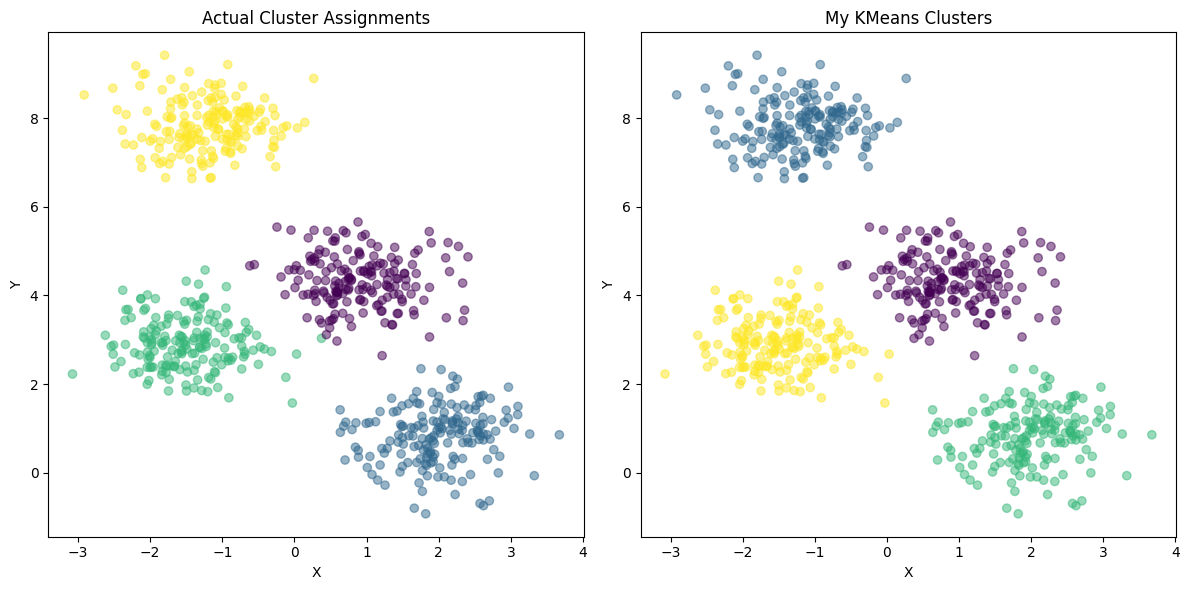

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.5)
plt.title('Actual Cluster Assignments')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=cluster_hypotheses, cmap='viridis', alpha=0.5)
plt.title('My KMeans Clusters')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

# Extended K-Means

In [ ]:
kmeans = My_KMeans(k=4, max_iterations=100, balanced=True)
cluster_hypotheses, centroids = kmeans.fit(X)
centroids

[[1.9877063026473274, 0.8318857877497887],
 [-1.2040579337244177, 7.837858432492295],
 [-1.4997094181421273, 2.905741940858995],
 [0.9004393234899268, 4.32217463716]]

In [ ]:
unique_values, counts = np.unique(cluster_hypotheses, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 175
Value: 1, Count: 175
Value: 2, Count: 174
Value: 3, Count: 176


* As we can see, in my extended version of K-Means, there are roughly same no. of samples in each clusters. i.e **175**

## Actual assignments vs sklearn's hypotheses

In [ ]:
sk_kmeans = KMeans(n_clusters=4)

In [ ]:
sk_kmeans.fit(X)

D:\SAHIL\Coding\Machine Learning\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [ ]:
sk_kmeans.cluster_centers_

array([[ 0.90043932,  4.32217464],
       [ 1.9877063 ,  0.83188579],
       [-1.20405793,  7.83785843],
       [-1.49970942,  2.90574194]])

In [ ]:
comparison_df['sk_hypotheses'] = sk_kmeans.labels_
comparison_df['sk_difference'] = comparison_df.cluster_assignments - comparison_df.sk_hypotheses
comparison_df

,cluster_assignments,cluster_hypotheses,difference,sk_hypotheses,sk_difference
0,3,1,2,2,1
1,3,1,2,2,1
2,1,2,-1,1,0
3,3,1,2,2,1
4,1,2,-1,1,0
...,...,...,...,...,...
695,2,3,-1,3,-1
696,3,1,2,2,1
697,2,3,-1,3,-1
698,2,3,-1,3,-1


In [ ]:
comparison_df[comparison_df['sk_difference'] == 0]

,cluster_assignments,cluster_hypotheses,difference,sk_hypotheses,sk_difference
2,1,2,-1,1,0
4,1,2,-1,1,0
6,1,2,-1,1,0
7,1,2,-1,1,0
8,1,2,-1,1,0
...,...,...,...,...,...
687,1,2,-1,1,0
688,0,0,0,0,0
692,1,2,-1,1,0
693,1,2,-1,1,0


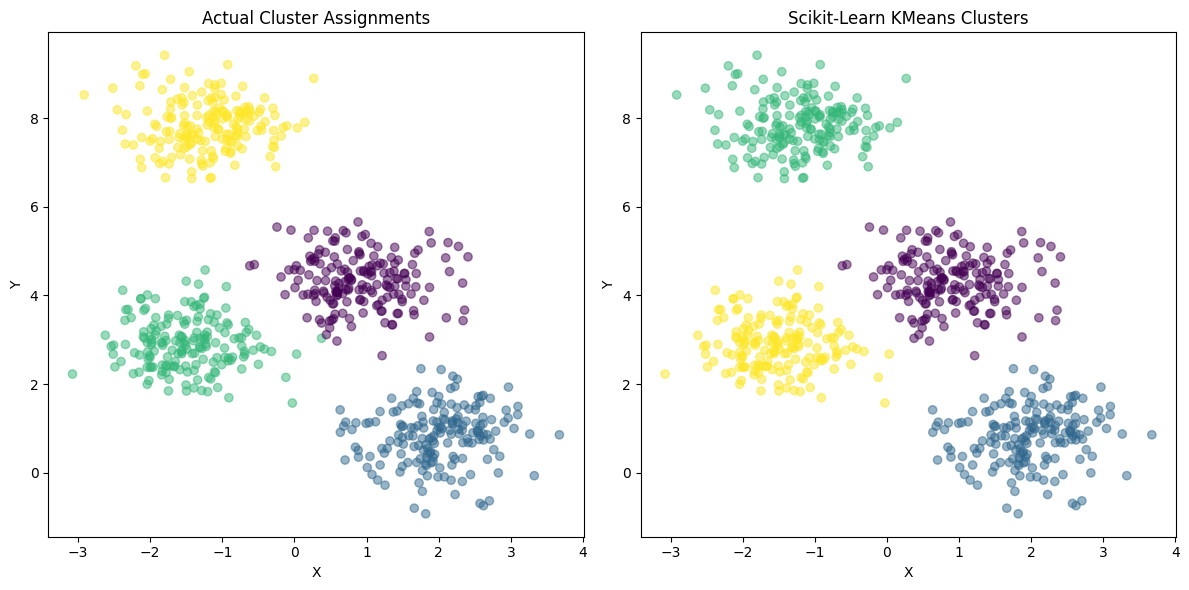

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.5)
plt.title('Actual Cluster Assignments')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=comparison_df.sk_hypotheses, cmap='viridis', alpha=0.5)
plt.title('Scikit-Learn KMeans Clusters')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

## Comparison of my implementation vs sklearn's implementation

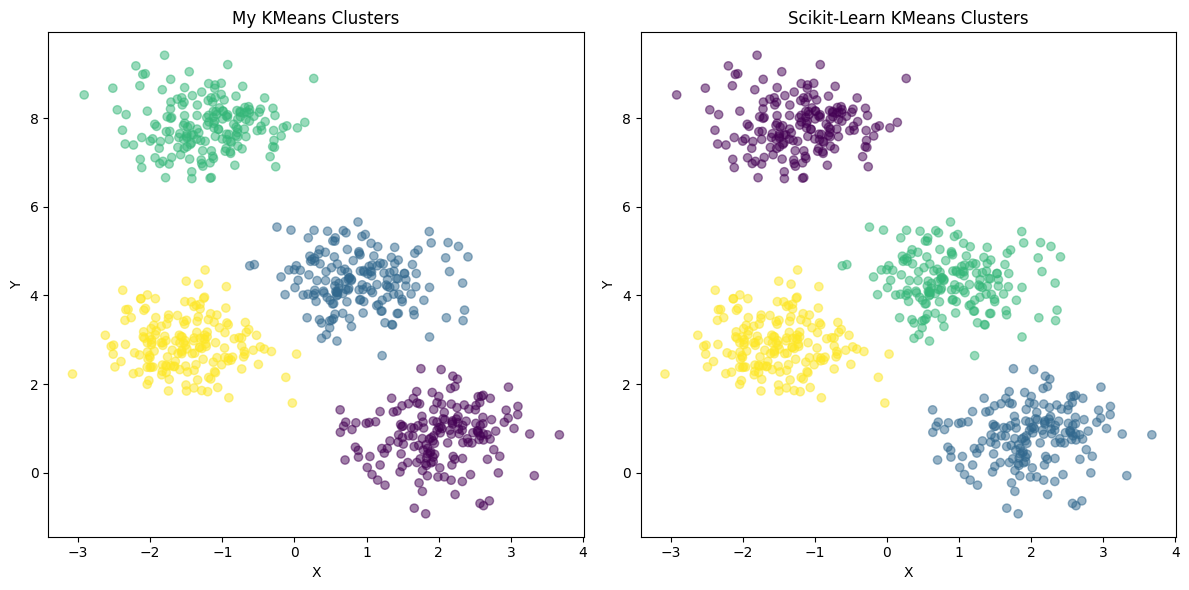

In [ ]:
# Plotting the comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=cluster_hypotheses, cmap='viridis', alpha=0.5)
plt.title('My KMeans Clusters')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=comparison_df.sk_hypotheses, cmap='viridis', alpha=0.5)
plt.title('Scikit-Learn KMeans Clusters')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

# Running different Clustering algorithms

**Goals to find out:**

1. The reason why you chose the clustering algorithm(s)
2. Any pre-processing of the data or any hyperparameter settings
3. Output from the algorithm(s) -- show what clusters were generated
4. The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected?

# Dataset: Taxi

In [2]:
df = pd.read_csv('Taxi_Trips__2013-2023_.csv')
df

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,275f3f891b8c0ba8f2958873f850d2a03993c99f5f79f6...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,1140.0,11.20,NaN,NaN,76.0,NaN,...,21.0,49.75,Cash,4053 - 40193 Adwar H. Nikola,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
1,11eeb6710caa0606028c7ba025bfa18c277886e8,6c87f1d023a9d7146ae81b6aa4648bf98cec52cceb9f08...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,660.0,2.70,NaN,NaN,32.0,7.0,...,0.0,13.00,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
2,113aa7bf346c585bb941cda2d5c0015c8a1472f0,bb4e75d3065311c33024a434640731c43fd2cf9e4482eb...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,480.0,0.00,NaN,NaN,8.0,24.0,...,0.0,9.75,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
3,2503e3944e5c82b89638447ad361638111129375,57c40509cae37a0e5e536a657cdb7f8c6824314bc466a7...,02/01/2023 12:15:00 AM,02/01/2023 12:45:00 AM,1620.0,0.00,1.703198e+10,NaN,76.0,NaN,...,28.0,91.00,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN
4,23ddcfba2ad714fe0303909961ea74873be50da2,40720025b84fa778c47d6637db01b1d8f2de2eabafa529...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,360.0,0.10,NaN,NaN,76.0,NaN,...,4.0,13.75,Cash,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101783,9209df4c3541198fda3173a226f2df619a806022,dee6032433df09fe8d3fd4fa958380308c902dc98f81c3...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,760.0,2.69,1.703183e+10,1.703132e+10,28.0,32.0,...,0.0,10.90,Mobile,Medallion Leasin,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
101784,f0957a8f6bef37bb2872649fb3c76ad1a179acab,3f6562a2a18861cf21a21101c14cc91dd7c4d72cdce80f...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,4.0,0.00,NaN,NaN,8.0,8.0,...,0.0,77.40,Credit Card,Chicago Independents,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
101785,4cb74df671cfccceb9b592f347ef1a94c1540c7a,b31f46efa11263565e3dba91f26ff96b74516e8108ac56...,02/14/2023 10:30:00 AM,02/14/2020 06:00:00 PM,NaN,2.90,NaN,NaN,8.0,24.0,...,0.0,13.50,Cash,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
101786,7f24c5101df65952ef318f558b8b071989ff7c17,65057dc10e707a18a32bc4371c5db0b828e90f9caf1068...,04/27/2023 11:15:00 AM,04/21/2019 09:30:00 PM,NaN,15.10,NaN,NaN,76.0,7.0,...,4.0,52.90,Credit Card,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     101788 non-null  object 
 1   Taxi ID                     101779 non-null  object 
 2   Trip Start Timestamp        101788 non-null  object 
 3   Trip End Timestamp          101788 non-null  object 
 4   Trip Seconds                101763 non-null  float64
 5   Trip Miles                  101788 non-null  float64
 6   Pickup Census Tract         35179 non-null   float64
 7   Dropoff Census Tract        35054 non-null   float64
 8   Pickup Community Area       95650 non-null   float64
 9   Dropoff Community Area      92192 non-null   float64
 10  Fare                        101681 non-null  float64
 11  Tips                        101681 non-null  float64
 12  Tolls                       101681 non-null  float64
 13  Extras        

In [67]:
df.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,101763.000000,101788.000000,3.517900e+04,3.505400e+04,95650.000000,92192.000000,101681.000000,101681.000000,101681.000000,101681.000000,101681.000000,95657.000000,95657.000000,92489.000000,92489.000000
mean,1102.644891,6.021135,1.703149e+10,1.703140e+10,33.230946,25.300764,20.466054,2.452347,0.014503,1.679117,24.739358,41.898703,-87.689956,41.892116,-87.657546
std,1831.031101,7.572349,3.696445e+05,3.377955e+05,25.309183,20.270499,18.103452,3.918353,0.602782,5.208910,22.641634,0.064621,0.104274,0.059306,0.063430
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625
25%,420.000000,0.870000,1.703108e+10,1.703108e+10,8.000000,8.000000,7.750000,0.000000,0.000000,0.000000,9.500000,41.878866,-87.695013,41.878866,-87.663518
50%,836.000000,2.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,13.500000,0.000000,0.000000,0.000000,16.000000,41.895033,-87.642649,41.892508,-87.633308
75%,1516.000000,10.800000,1.703184e+10,1.703184e+10,50.000000,32.000000,31.000000,3.000000,0.000000,1.000000,33.900000,41.949829,-87.626211,41.922686,-87.625192
max,86003.000000,814.300000,1.703198e+10,1.703198e+10,77.000000,77.000000,999.000000,250.000000,78.000000,182.000000,999.000000,42.015934,-87.534903,42.021224,-87.534903


<Axes: xlabel='Dropoff Centroid Longitude', ylabel='Dropoff Centroid Latitude'>

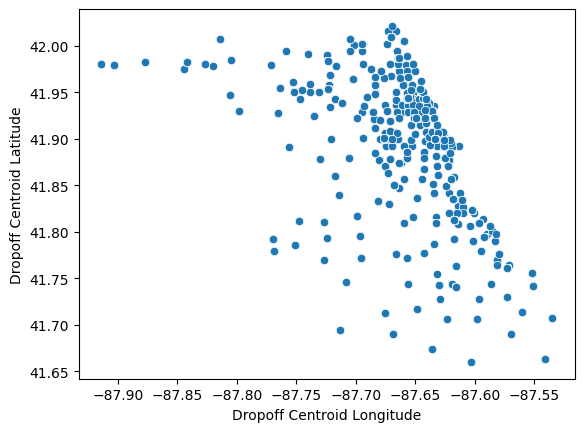

In [68]:
sns.scatterplot(data=df, x=df['Dropoff Centroid Longitude'], y=df['Dropoff Centroid Latitude'])

In [21]:
clean_df = df[[ 'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']]
clean_df = clean_df.dropna()
clean_df

,Dropoff Centroid Latitude,Dropoff Centroid Longitude
1,41.922686,-87.649489
2,41.901207,-87.676356
5,41.944227,-87.655998
6,41.946511,-87.806020
8,41.922686,-87.649489
...,...,...
101782,41.899602,-87.633308
101783,41.884987,-87.620993
101784,41.899602,-87.633308
101785,41.901207,-87.676356


In [22]:
# Normalizing data

ss = StandardScaler()
ss.fit(clean_df.iloc[:])
x = ss.transform(clean_df.iloc[:])
x

array([[ 0.51546679,  0.12703295],
       [ 0.15328804, -0.29654457],
       [ 0.87867456,  0.02440775],
       ...,
       [ 0.12622688,  0.38213069],
       [ 0.15328804, -0.29654457],
       [ 0.51546679,  0.12703295]])

## KMeans

In [23]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300)
kmeans.fit(x)

KMeans(n_clusters=4, n_init=10)

In [24]:
kmeans.cluster_centers_

array([[ 1.1382069 , -0.383108  ],
       [-2.09041343,  0.42827299],
       [-0.07584994,  0.32200219],
       [ 1.46820468, -3.6869351 ]])

In [25]:
ss.inverse_transform(kmeans.cluster_centers_)

array([[ 41.95961837, -87.68184665],
       [ 41.76814255, -87.63038126],
       [ 41.88761779, -87.63712195],
       [ 41.97918914, -87.89140636]])

In [26]:
kmeans.labels_

array([2, 2, 0, ..., 2, 2, 2], dtype=int32)

In [27]:
unique_values, counts = np.unique(kmeans.labels_, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 17489
Value: 1, Count: 10609
Value: 2, Count: 59757
Value: 3, Count: 4634


<Axes: xlabel='Dropoff Centroid Longitude', ylabel='Dropoff Centroid Latitude'>

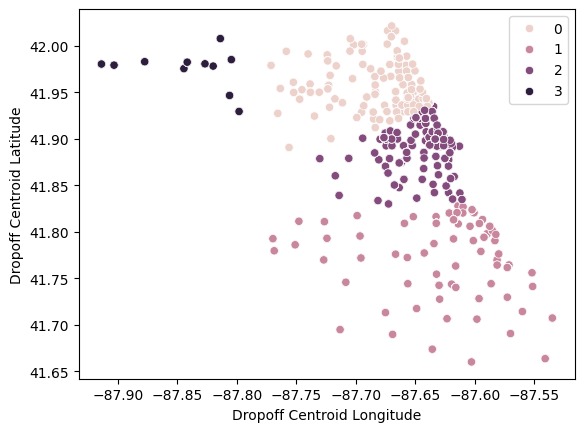

In [28]:
sns.scatterplot(data=clean_df, x=clean_df['Dropoff Centroid Longitude'], y=clean_df['Dropoff Centroid Latitude'], hue=kmeans.labels_)

## DBSCAN

In [12]:
# For DBSCAN & hierarchical, selecting only 1/10th subset of data
subset_df = clean_df.sample(n=len(clean_df) // 10, replace=False)
subset_df

,Dropoff Centroid Latitude,Dropoff Centroid Longitude
73961,41.986712,-87.663416
84288,41.901207,-87.676356
70302,41.792357,-87.617931
10301,41.884987,-87.620993
3967,41.878866,-87.625192
...,...,...
95494,41.891972,-87.612945
65522,41.874005,-87.663518
87103,41.880994,-87.632746
87568,41.878866,-87.625192


In [31]:
# Normalize subset_df
ss.fit(subset_df.iloc[:])
subset_x = ss.transform(subset_df.iloc[:])
subset_x

array([[ 1.62270092, -0.1208661 ],
       [ 0.15932879, -0.33569116],
       [-1.70358079,  0.63428364],
       ...,
       [-0.18659847,  0.3883208 ],
       [-0.22303331,  0.51373929],
       [ 1.49192936, -4.09913012]])

In [34]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=0.2, min_samples=50)
cluster.fit(subset_x)
dbscan_clusters = cluster.labels_
np.unique(dbscan_clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17])

<Axes: xlabel='Dropoff Centroid Longitude', ylabel='Dropoff Centroid Latitude'>

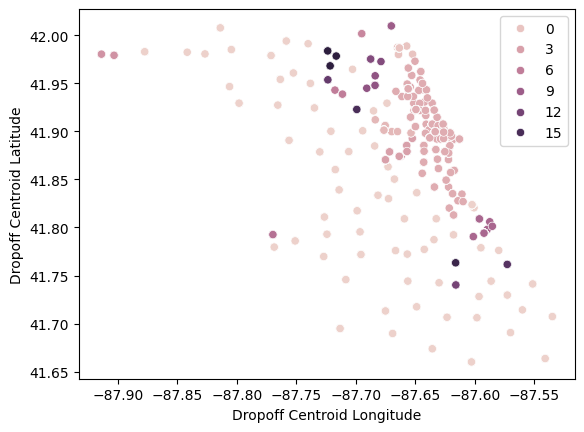

In [17]:
sns.scatterplot(data=subset_df, x='Dropoff Centroid Longitude', y='Dropoff Centroid Latitude', hue=dbscan_clusters)

## Hierarchical

In [35]:
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical.fit(subset_x)
hierarchical_clusters = hierarchical.labels_
np.unique(hierarchical_clusters)

array([0, 1, 2, 3])

<Axes: xlabel='Dropoff Centroid Longitude', ylabel='Dropoff Centroid Latitude'>

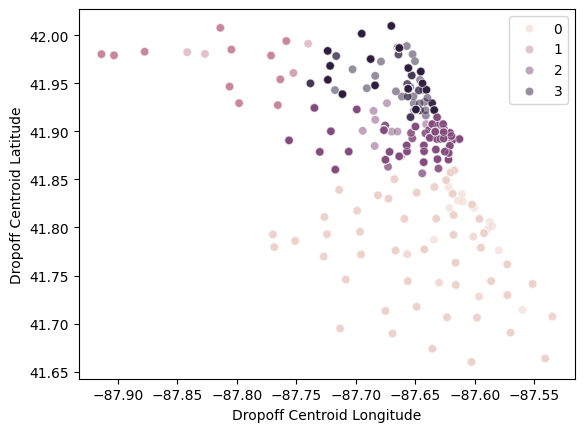

In [19]:
sns.scatterplot(data = subset_df, x='Dropoff Centroid Longitude', y='Dropoff Centroid Latitude', hue=hierarchical_clusters, alpha = 0.5)


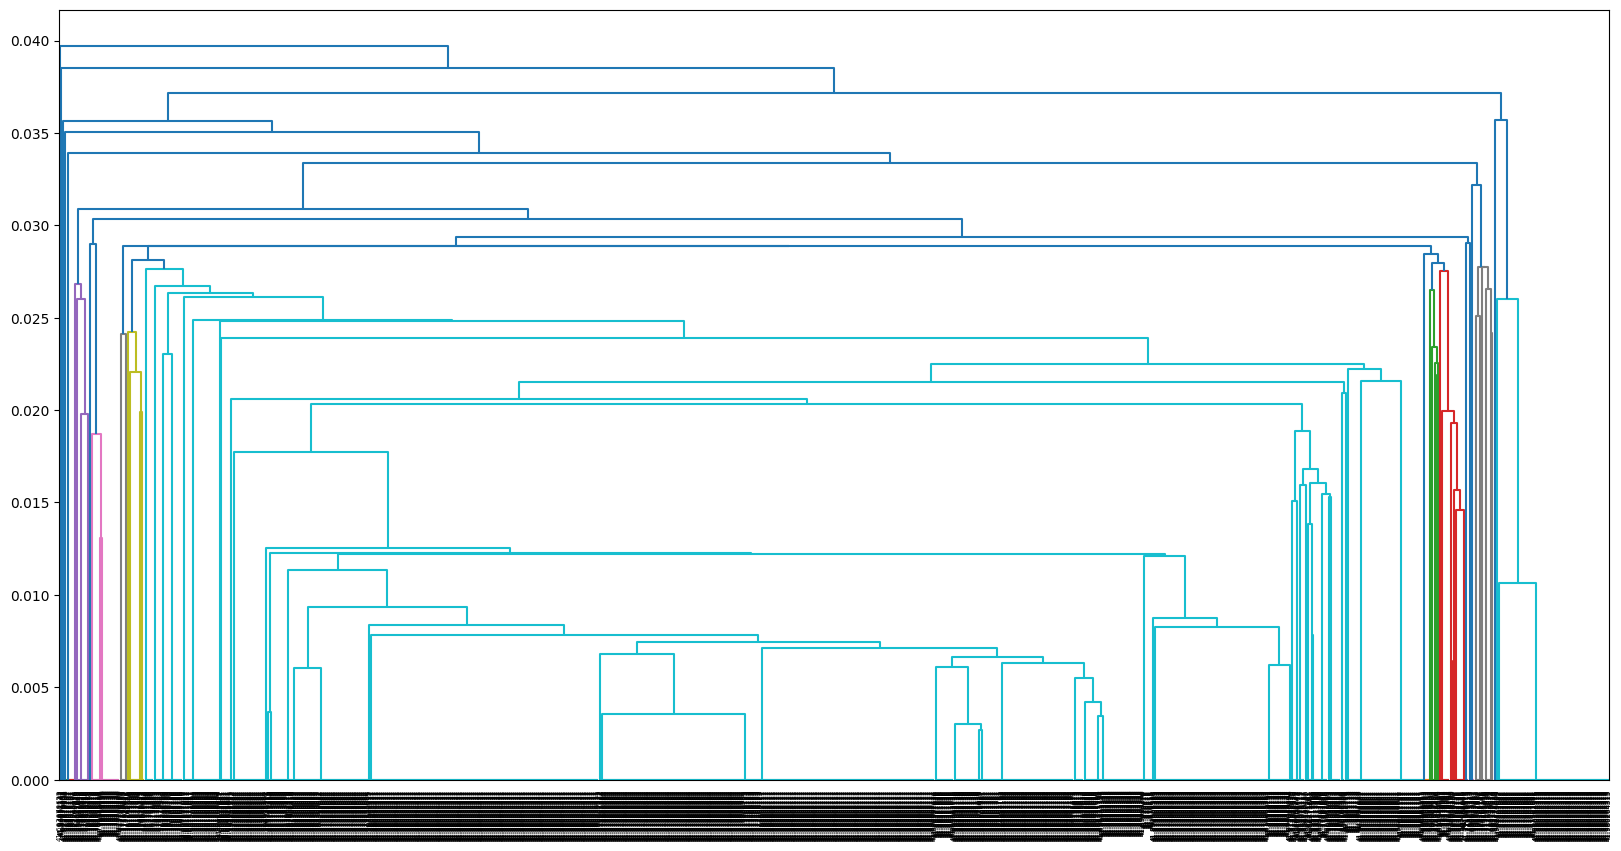

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram

def leaf_label_function(index):
    return clean_df.iloc[index, 0]


plt.figure(figsize=(20,10))
dend = dendrogram(linkage(clean_df.iloc[:10000, -2:]), leaf_label_func=leaf_label_function)

plt.show()

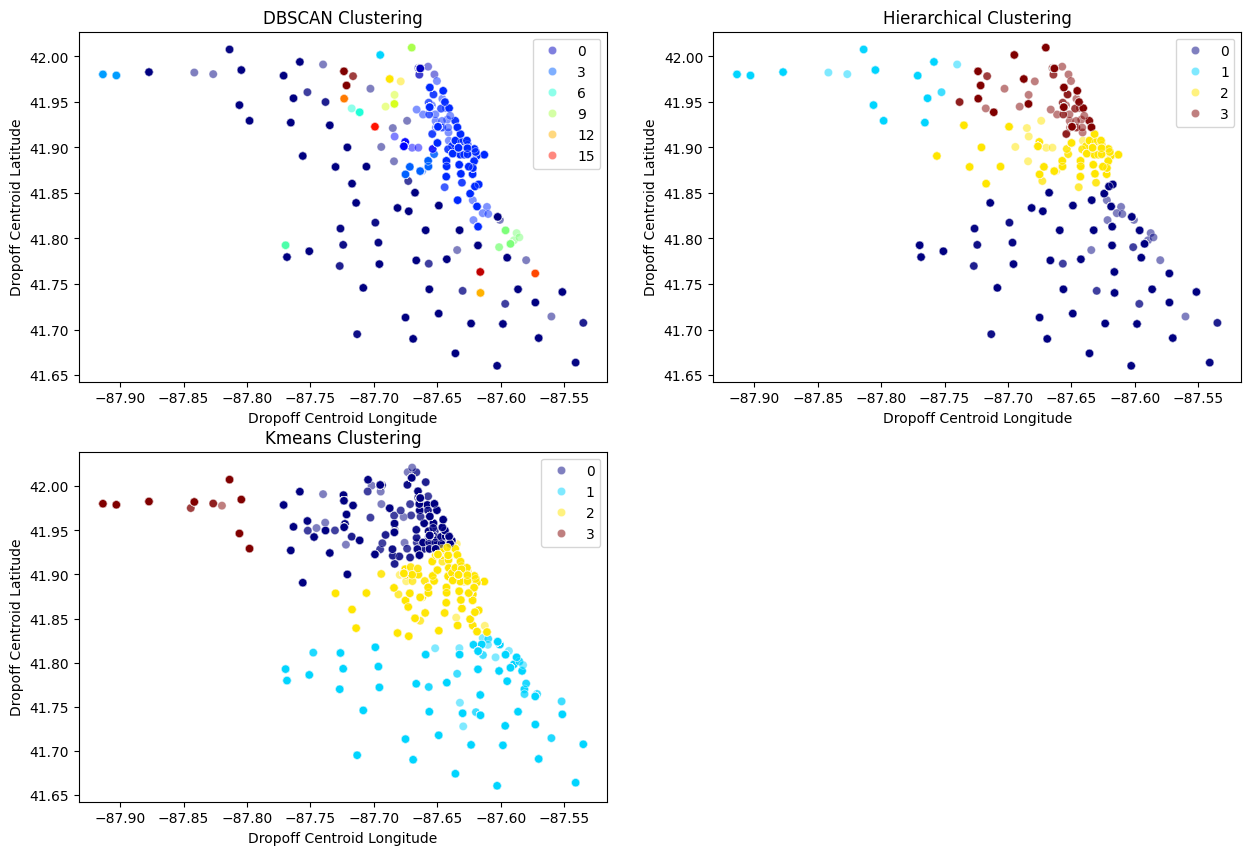

In [29]:
# Visualize the clusters
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data = subset_df, x='Dropoff Centroid Longitude', y='Dropoff Centroid Latitude', hue=dbscan_clusters, palette=plt.get_cmap('jet'), alpha = 0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Dropoff Centroid Longitude')
plt.ylabel('Dropoff Centroid Latitude')

plt.subplot(2, 2, 2)
sns.scatterplot(data = subset_df, x='Dropoff Centroid Longitude', y='Dropoff Centroid Latitude', hue=hierarchical_clusters, palette=plt.get_cmap('jet'), alpha = 0.5)
plt.title('Hierarchical Clustering')
plt.xlabel('Dropoff Centroid Longitude')
plt.ylabel('Dropoff Centroid Latitude')

plt.subplot(2, 2, 3)
sns.scatterplot(data = clean_df, x='Dropoff Centroid Longitude', y='Dropoff Centroid Latitude', hue=kmeans.labels_, palette=plt.get_cmap('jet'), alpha = 0.5)
plt.title('Kmeans Clustering')
plt.xlabel('Dropoff Centroid Longitude')
plt.ylabel('Dropoff Centroid Latitude')

# plt.savefig("dbscan_vs_hierarchical.png")
plt.show()

## Q1. Reason for chosing KMeans Clustering
* So I tried all the 3 clustering approaches and as we can see from the scatterplot above, KMeans is really good at clustering this data based on dropoff locations.
* Hierarchical also did a pretty good job at clustering the data as seen from the scatterplot & dendogra. *(also evidenced by the silhouette score below)*
* On the other hand, DBScan mixed up the clusters and created a huge number of clusters which were not really necessary. Changing the hyperparameters might give good results in case of DBScan.

## Q2. Preprocessing of data
* Used StandardScaler to scale taxi data
* **Hyper-parameters for KMeans**:
  * no. of clusters = **4**
  * no of times to run kmeans = **10**
  * max_iterations = **300**
* **Hyper-parameters for DBSCAN**:
  * eps = 0.2
  * hoodsize = 50
* **Hyper-parameters for Hierarchical**:
  * no. of clusters = **4**

## Q3. Output
* No. of clusters generated by KMeans is **4**. (explicitly defined)
  * Cluster: 0, No. of samples: 17489
  * Cluster: 1, No. of samples: 10609
  * Cluster: 2, No. of samples: 59757
  * Cluster: 3, No. of samples: 4634
* No. of clusters generated by DBSCan is **18** (-1 for outliers)
* No. of clusters generated by Hierarchical is **4**

## Q4. Performance Evaluation

* The metric which I used to evaluate the performance of various clustering algorithms is Silhouette Score.
* The Silhouette Score measures how well-defined the clusters are and ranges from -1 to 1, where higher values indicate better clustering.
* KMeans Silhouette Score: **0.602**
* DBSCAN Silhouette Score: **0.259%**
* Hierarchical Silhoette Score: **0.518%**
* This indicated that the best algorithm to perform clustering on Taxi dataset would be KMeans, although 0.6 is not that good.


In [32]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(x, kmeans.labels_)
print("KMeans Silhouette Score:", silhouette_kmeans)

silhouette_dbscan = silhouette_score(subset_x, dbscan_clusters)
print("DBSCAN Silhouette Score:", silhouette_dbscan)

silhouette_hierarchical = silhouette_score(subset_x, hierarchical_clusters)
print("Hierarchical Clustering Silhouette Score:", silhouette_hierarchical)

KMeans Silhouette Score: 0.6024185702741013
DBSCAN Silhouette Score: 0.2590804172531644
Hierarchical Clustering Silhouette Score: 0.5180343390791303


# Dataset: Mopsi

In [ ]:
columns = ['X', 'Y']
mopsi_df = pd.read_csv("MopsiLocationsUntil2012-Finland.txt", sep='\t')
mopsi_df.columns = columns
mopsi_df

,X,Y
0,626146,297440
1,626144,297456
2,626004,297394
3,626018,297437
4,626038,297518
...,...,...
13461,626042,297444
13462,625977,297443
13463,626050,297404
13464,625995,297426


In [ ]:
mopsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13466 entries, 0 to 13465
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       13466 non-null  int64
 1   Y       13466 non-null  int64
dtypes: int64(2)
memory usage: 210.5 KB


In [ ]:
mopsi_df.describe()

,X,Y
count,13466.000000,13466.00000
mean,625094.709936,289004.04270
std,7844.619064,20400.05631
min,599247.000000,212016.00000
25%,625930.000000,296160.00000
50%,626018.000000,297448.00000
75%,626192.000000,297796.75000
max,697835.000000,314328.00000


In [ ]:
mopsi_df.corr()

,X,Y
X,1.000000,0.351542
Y,0.351542,1.000000


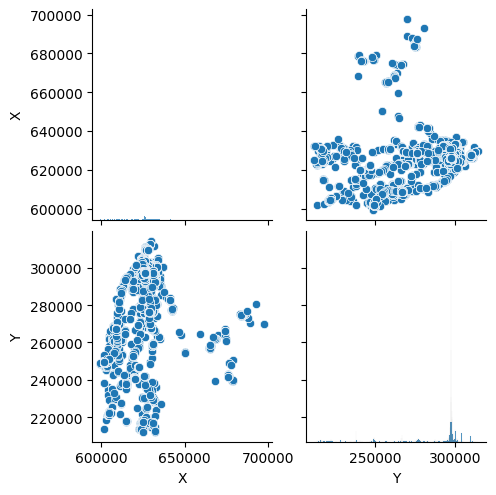

In [ ]:
sns.pairplot(mopsi_df)

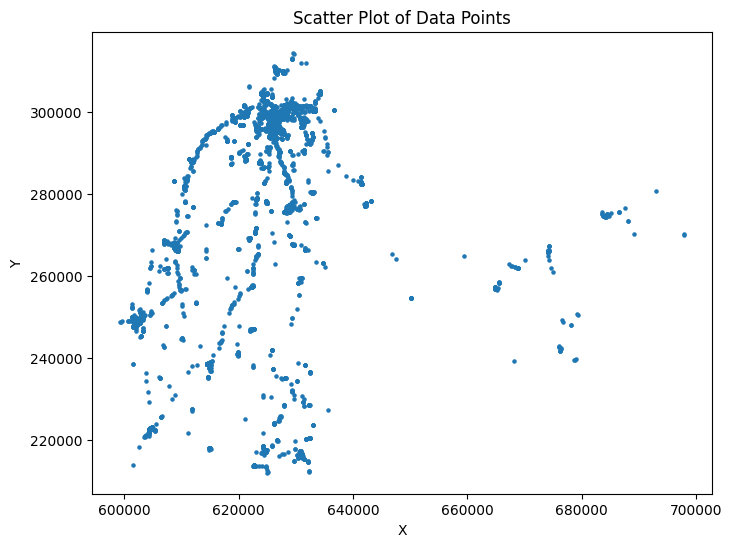

In [ ]:
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(mopsi_df['X'], mopsi_df['Y'], s=5)
plt.title('Scatter Plot of Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(mopsi_df[['X', 'Y']])
X_scaled

array([[0.13401914, 0.41354153],
       [0.13376418, 0.41432587],
       [0.11591689, 0.41128655],
       ...,
       [0.121781  , 0.41177677],
       [0.11476956, 0.41285523],
       [0.11311231, 0.41310034]])

In [ ]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan.fit(X_scaled)
dbscan_clusters = dbscan.labels_
np.unique(dbscan_clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [ ]:
# Perform Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical.fit(X_scaled)
hierarchical_clusters = hierarchical.labels_
hierarchical_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

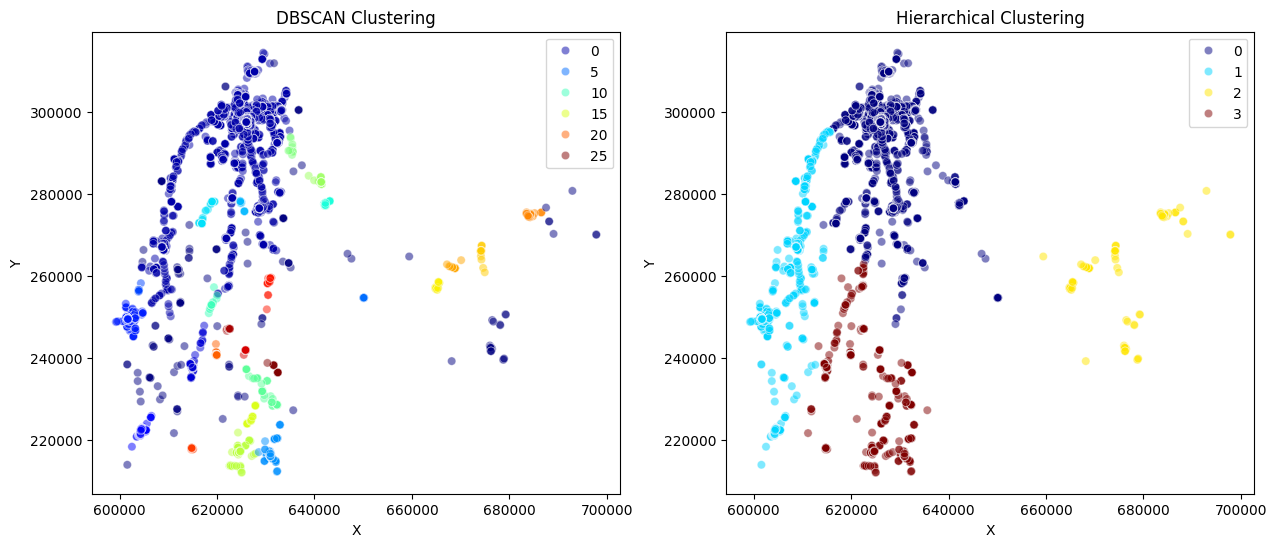

In [ ]:
# Visualize the clusters
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data = mopsi_df, x='X', y='Y', hue=dbscan_clusters, palette=plt.get_cmap('jet'), alpha = 0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
sns.scatterplot(data = mopsi_df, x='X', y='Y', hue=hierarchical_clusters, palette=plt.get_cmap('jet'), alpha = 0.5)
plt.title('Hierarchical Clustering')
plt.xlabel('X')
plt.ylabel('Y')

plt.savefig("dbscan_vs_hierarchical.png")
plt.show()

## Q1. Reason for chosing Hierarchical Clustering
* So as we can see from the above figure, that DBSCAN is not properly generating the clusters. It also labelled some of the outliers (samples whoose X > 65000) into clusters.
* On the other hand Hierarchical clustering perfectly labelled every sample into their own clusters.

## Q2. Preprocessing of data
* Used StandardScaler to scale mopsi_df data
* **Hyper-parameters for DBSCAN**:
  * eps = **0.2**, min_samples = **10**
* **Hyper-parameters for Hierarchical**:
  * no. of clusters = **3**

## Q3. Output
* No. of clusters generated by DBScan is **26**. (-1 for outliers)
* No. of clusters generated by Hierarchical is **3** (explicitly defined)

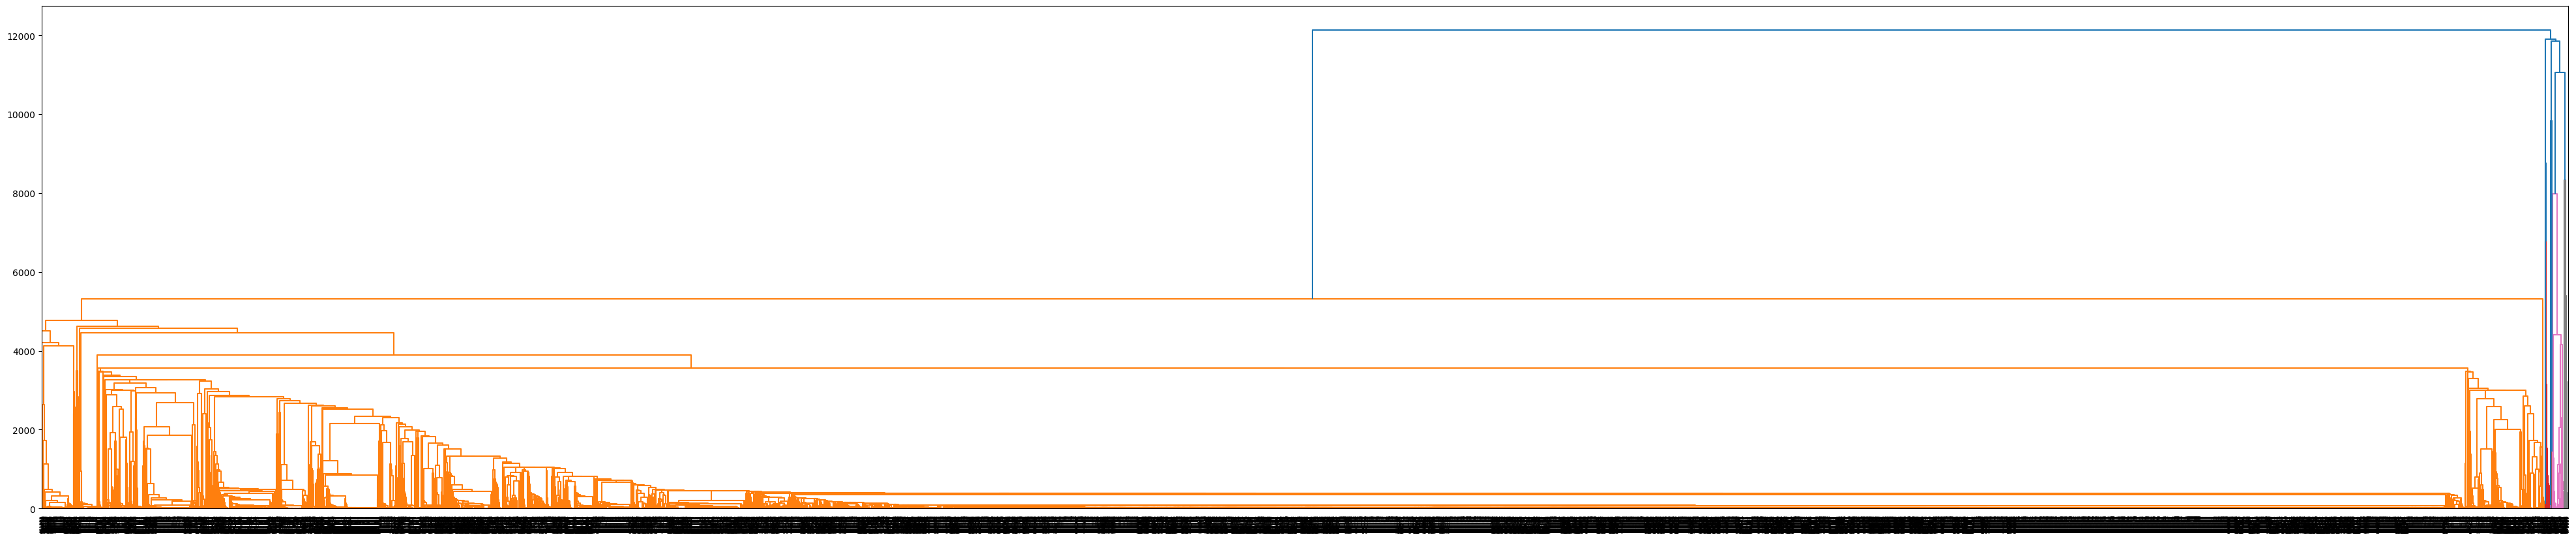

In [ ]:
def leaf_label_function(index):
  return mopsi_df.iloc[index, 0]

plt.figure(figsize=(50,10))
dend = dendrogram(linkage(mopsi_df[['X', 'Y']]), leaf_label_func=leaf_label_function)

plt.savefig("mopsi_dendrogram.png")
plt.show()

## Q4. Performance Evaluation

* The Silhouette Score DBSCAAN is 0.5089, indicating moderate clustering quality, while the Silhouette Score of Hierarchical Clustering is 0.8211, indicating high clustering quality.
* The performance of the Hierarchical Clustering algorithm was better than that of the DBSCAN algorithm, as evidenced by the higher Silhouette Score. This indicates that the clusters produced by Hierarchical Clustering are more well-defined and internally cohesive compared to those produced by DBSCAN.
* I was expecting similar results due to the scatterplot which I plotted earlier.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_dbscan = silhouette_score(X_scaled, dbscan_clusters)
print("DBSCAN Silhouette Score:", silhouette_dbscan)

silhouette_hierarchical = silhouette_score(X_scaled, hierarchical_clusters)
print("Hierarchical Clustering Silhouette Score:", silhouette_hierarchical)

DBSCAN Silhouette Score: 0.5089790035584482
Hierarchical Clustering Silhouette Score: 0.8211291975310703
